## A) Upload, Clean and Manipulate the data.

In [1]:
# 1. import helper libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import all paths of file needed
DATASET_PATH = '/content/drive/My Drive/Machine Learning Projects/Regression_SP500/Dataset'
train_data = os.path.join(DATASET_PATH,'timeseries_train.csv') 
test_data = os.path.join(DATASET_PATH,'timeseries_test.csv')

In [3]:
df = pd.read_csv(train_data, sep=';')


In [4]:
print(df.columns)

Index(['dates', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
       'Rfree',
       ...
       'France: Paris Stock Market: Price Index: CAC 40 (AVG, Dec-31-87=1000)',
       'Germany: Stock Market Indexes: DAX Performance Index (AVG, Dec-30-87=1000)',
       'Germany: Deutsche Boerse Market Capitalization (EOP, Mil.Euros)',
       'Italy: Stock Price Index: FTSE MIB (AVG, Dec-31-97=24401.54)',
       'Italy: Borsa Italiana Market Capitalization (EOP, Mil.EUR)',
       'Japan: Nikkei Stock Average: TSE 225 Issues (AVG, May-16-49=100)',
       'Japan: 1st Tokyo Stock Exchange: Market Capitalization (EOP, Bil.Yen)',
       'U.K.: London Stock Exchange: FTSE 100 (EOP, Jan-2-84=1000)',
       'UK: London Stock Exchange Market Capitalization (EOP, Mil.EUR)',
       'CRSP_SPvw'],
      dtype='object', length=163)


In [5]:
print(df.head())

      dates  ...  CRSP_SPvw
0  31/01/70  ...  -0.075398
1  28/02/70  ...   0.059521
2  31/03/70  ...   0.002806
3  30/04/70  ...  -0.088831
4  31/05/70  ...  -0.054689

[5 rows x 163 columns]


In [6]:
df.shape


(480, 163)

In [ ]:
df.dropna(thresh=0.8*len(df), axis=1)


In [7]:
# ----    3.  Compute the percentage of NaN for each column and drop the columns that have less than 10years of observations, hence less than 120 NaN. ---  #


#columns with missing values
missing = df.isnull().sum()
# print(missing)
#percentage of columns with missing values
percent_missing = round(missing*100/len(df),2)
#columns with more than 10% of NaN
percent_missing_index = percent_missing > 10

#column that have to be drop
col_to_drop = percent_missing_index[percent_missing_index==True]

col_to_drop = list(col_to_drop.index)
print(col_to_drop)

df_backup = df

df.drop(col_to_drop, axis = 1 , inplace = True)

# print(f"After Droping shape of dataframe is : {df.shape}")

['csp', 'E/P 10y', 'ACOGNO', 'UMCSENTx', 'Canada: S&P/TSX Composite Index, Close Price (AVG, 1975=1000)', 'Canada: TSX Group Market Capitalization (EOP, Mil.C$)', 'EU 27: MSCI Share Price Index ex Div, LocCur (NSA, EOP, Dec-87=100)', 'France: Paris Stock Market: Price Index: CAC 40 (AVG, Dec-31-87=1000)', 'Germany: Stock Market Indexes: DAX Performance Index (AVG, Dec-30-87=1000)', 'Germany: Deutsche Boerse Market Capitalization (EOP, Mil.Euros)', 'Italy: Stock Price Index: FTSE MIB (AVG, Dec-31-97=24401.54)', 'Italy: Borsa Italiana Market Capitalization (EOP, Mil.EUR)', 'U.K.: London Stock Exchange: FTSE 100 (EOP, Jan-2-84=1000)', 'UK: London Stock Exchange Market Capitalization (EOP, Mil.EUR)']


In [8]:
# 4. Create a list which contains all the names of the columns with at least one NaN value. (Hint: % bigger than zero, use command .loc()).

miss_one = list(df.columns[df.isnull().any()])

In [9]:
# 5. Fill the NaN using the median or the mean for each variable. If there are NaN at the endof the sample you can fill them using the .ffill(), which fills the NaN using the last available
# data point.

# print(df.mean())
df  = df.fillna(df.mean())

In [10]:
df.columns


numCols = df.select_dtypes("number").columns
catCols = df.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))
print(numCols)
print(catCols)

['S&P div yield', 'CP3Mx', 'D12', 'TB6SMFFM', 'Japan: Nikkei Stock Average: TSE 225 Issues (AVG, May-16-49=100)', 'PERMITW', 'Rfree', 'PAYEMS', 'IPB51222S', 'IPFPNSS', 'EXSZUSx', 'BUSINVx', 'IPNMAT', 'CUMFNS', 'IPFUELS', 'RPI', 'INVEST', 'PERMITS', 'CPIAPPSL', 'HOUSTS', 'M2REAL', 'GS1', 'WPSID61', 'PPICMM', 'PERMITNE', 'D/E payout', 'NDMANEMP', 'USFIRE', 'DMANEMP', 'HOUST', 'USCONS', 'CE16OV', 'UEMP15OV', 'INDPRO', 'EXUSUKx', 'M2SL', 'OILPRICEx', 'HOUSTMW', 'FEDFUNDS', 'CUSR0000SAS', 'WPSFD49207', 'GS5', 'USTRADE', 'PERMITMW', 'EXCAUSx', 'AWHMAN', 'T1YFFM', 'AAA', 'BAAFFM', 'ANDENOx', 'UEMPMEAN', 'M1SL', 'DTCTHFNM', 'MZMSL', 'ISRATIOx', 'b/m', 'GS10', 'NONBORRES', 'T5YFFM', 'USWTRADE', 'BUSLOANS', 'Japan: 1st Tokyo Stock Exchange: Market Capitalization (EOP, Bil.Yen)', 'lty', 'IPDMAT', 'CES0600000007', 'TB6MS', 'AAA.1', 'REALLN', 'CES2000000008', 'PERMIT', 'WPSFD49502', 'ntis', 'BAA.1', 'AMDMNOx', 'dfy', 'ltr', 'TOTRESNS', 'CES0600000008', 'CLAIMSx', 'HWIURATIO', 'AAAFFM', 'IPBUSEQ', '

In [11]:
# 6. Check the type of the variables, dividing them among: Categorical, Dummy and Numerical.
# (Hint: use : select_dtypes(include=[type to include]).

# df_cont = df.select_dtypes(include = 'number')
# df_cat = df.select_dtypes(include = 'object') #no cat variable at all

df_cont = df.select_dtypes("number")
df_cat = df.select_dtypes("object")
print(f"Continuous Variables :  {df_cont}")
print(f"Categorical Variables : {df_cat}")


Continuous Variables :            D12  ...  CRSP_SPvw
0    0.408698  ...  -0.075398
1    0.105500  ...   0.059521
2    0.105100  ...   0.002806
3    0.105000  ...  -0.088831
4    0.105200  ...  -0.054689
..        ...  ...        ...
475 -2.280500  ...   0.034751
476 -2.333700  ...   0.036534
477 -2.108500  ...  -0.018259
478 -2.153900  ...   0.060257
479 -2.201300  ...   0.018983

[480 rows x 148 columns]
Categorical Variables :         dates
0    31/01/70
1    28/02/70
2    31/03/70
3    30/04/70
4    31/05/70
..        ...
475  31/08/09
476  30/09/09
477  31/10/09
478  30/11/09
479  31/12/09

[480 rows x 1 columns]


In [12]:
# 7. Separate the dates from the dataset (they will be helpful to plot the charts), separate the
# target SP500 monthly return rate (CRSP_SPvw) (y) from the dataset.

y = df_cont['CRSP_SPvw'] 

df_cont.drop(['CRSP_SPvw'], axis = 1 , inplace = True) # drop target varibale

X = df_cont.values
df_dates = df_cat   # seperate dates 
print(f"X variable shape: {X.shape}")
print(f"y variable shape: {y.shape}")
# df_cont.set_index(df_cat['dates'], inplace = True)

X variable shape: (480, 147)
y variable shape: (480,)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
# 8. Are there any Categorical variables? If yes, separate them from the Numerical.

# Answer. We've already seperate them from numerical data so now there is no Categorical varibale attached with numerical, and it is now seperated

In [14]:
# 9. Define the matrix of the predictors (X) using only the numerical variables inside the dataset.

# Answer. We've already done it and seperated it, and saved in X variable 

In [15]:
# 10. Standardize only the predictors. (X)

# normalized_X=(X.mean)/X.std() # mean normalization 
# normalized_df=(X.min())/(X.max()-X.min())  # min--max normalization 
standarized_X = StandardScaler().fit_transform(X)
print(standarized_X.shape)
print(type(standarized_X))
standarized_X =  pd.DataFrame(standarized_X)
print(type(standarized_X))

(480, 147)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
# 11. If the answer to point A.8 is yes, transfor the Categorical vairbales in Dummy Variables and include them into the dataset. ( hint: use drop_first = true)
standarized_X['dates'] = df_cat



In [17]:
print(standarized_X.columns)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           138,     139,     140,     141,     142,     143,     144,     145,
           146, 'dates'],
      dtype='object', length=148)


In [18]:
# 12. Compute the correlation of the new dataset and show the top 10 variables correlated with the target, SP500 monthly return rate (CRSP_SPvw).
# type(normalized_df)


corr_matrix = standarized_X.corrwith(y)
# print(corr_matrix)
ser = pd.Series(corr_matrix)
print("Top 10 variables correleated with target variable")
ser.to_frame()
ser.sort_values(ascending=False).head(10)

# ser.style.background_gradient(cmap='coolwarm', axis=None)


Top 10 variables correleated with target variable


144    0.745427
90     0.659790
91     0.653270
93     0.535205
146    0.400496
10     0.315496
145    0.277427
9      0.212480
18     0.136945
19     0.102710
dtype: float64

In [19]:

# 13. Separate the dates from the dataset (they will be helpful to plot the charts), separate the tar-get SP500 monthly return rate (CRSP_SPvw) (y) from the dataset, and create the dataframe of the predictors. (X)

X = standarized_X  # x variable 
dates = df_cat      # seperated date 
y = y



In [20]:
# print(standarized_X.columns)

cols = list(col_to_drop)
print(cols)

# test = test[cols]

['csp', 'E/P 10y', 'ACOGNO', 'UMCSENTx', 'Canada: S&P/TSX Composite Index, Close Price (AVG, 1975=1000)', 'Canada: TSX Group Market Capitalization (EOP, Mil.C$)', 'EU 27: MSCI Share Price Index ex Div, LocCur (NSA, EOP, Dec-87=100)', 'France: Paris Stock Market: Price Index: CAC 40 (AVG, Dec-31-87=1000)', 'Germany: Stock Market Indexes: DAX Performance Index (AVG, Dec-30-87=1000)', 'Germany: Deutsche Boerse Market Capitalization (EOP, Mil.Euros)', 'Italy: Stock Price Index: FTSE MIB (AVG, Dec-31-97=24401.54)', 'Italy: Borsa Italiana Market Capitalization (EOP, Mil.EUR)', 'U.K.: London Stock Exchange: FTSE 100 (EOP, Jan-2-84=1000)', 'UK: London Stock Exchange Market Capitalization (EOP, Mil.EUR)']


[link text](https://)## B) Fit and Estimate the models using a proper cross-validation exercise.

In [21]:
# Create and train the Support Vector Machine (Regressor) 
import datetime as dt

standarized_X['dates'] = pd.to_datetime(standarized_X['dates'])
standarized_X['dates']=standarized_X['dates'].map(dt.datetime.toordinal)

# testing data convert date format
# test['dates'] = pd.to_datetime(test['dates'])
# test['dates']=test['dates'].map(dt.datetime.toordinal)

# Split the data into 85% training and 15% testing
x_train, x_test, y_train, y_test = train_test_split(standarized_X, y, test_size=0.15,random_state= 90)




linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.
Now after that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score

### Linear Regrression

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

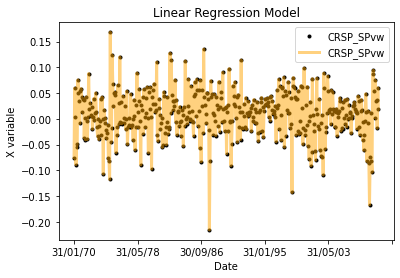

In [22]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
# df['pred'] = y_pred

ax = df.plot(x='dates', y='CRSP_SPvw', color='black', style='.')
df.plot(x='dates', y='CRSP_SPvw', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('Linear Regression Model')
ax.set_xlabel('Date')
ax.set_ylabel('X variable')

plt.show()


In [23]:
# Now compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
436,-0.028319,-0.030046
466,-0.073512,-0.057658
278,0.021202,0.020627
140,-0.050466,-0.051226
389,-0.071349,-0.072763
...,...,...
361,-0.017458,-0.016811
308,0.042102,0.040728
403,0.019597,0.021243
352,-0.023159,-0.022815


We can also visualize comparison result as a bar graph.
Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

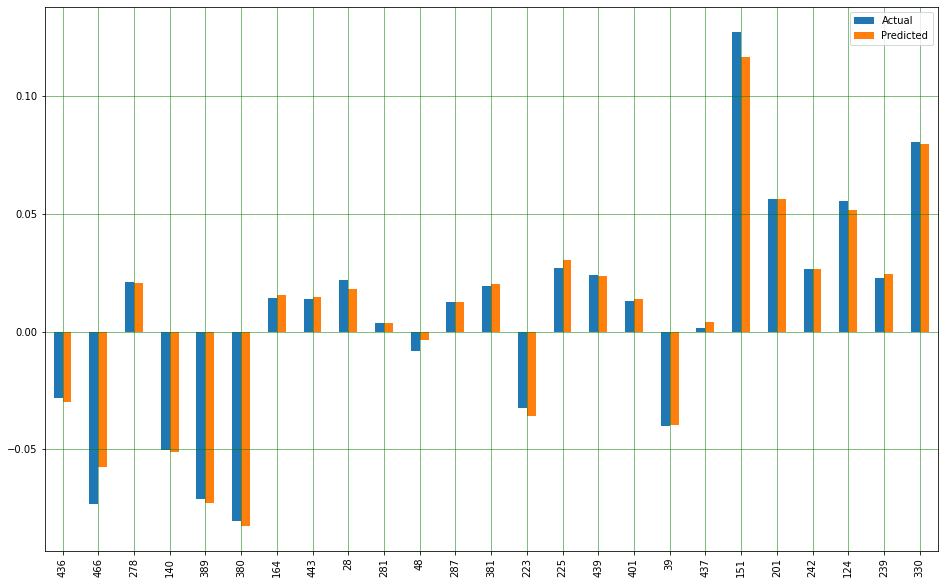

In [24]:

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

![alt text](https://)### Logistic Regression 

In [28]:
import xgboost as xgb
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred



model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 38.7min finished


[15:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.04198656500724663
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 1000, 'reg_alpha': 1.3, 'reg_lambda': 1.3, 'subsample': 0.9}


### Ridge Regression
Linear least squares with l2 regularization.



This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [ ]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)

# calculating mse

mse = np.mean((pred - y_test)**2)
score = ridgeReg.score(x_test,y_test)
# mse 1348171.96 ## calculating score ridgeReg.score(x_cv,y_cv) 0.5691
print(f'Mean Square Erroe: {mse}')
print(f'Score: {score}')
# 

### KNN

In [37]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_test)

mse = np.mean((y_test - preds)**2)

print(f'Mean square error: {mse}')
score = model.score(x_test,y_test)
print(f'Score: {score}')

Mean square error: 0.0012838963746781543
Score: 0.05613954691183731


### Lasso regression

Linear Model trained with L1 prior as regularizer (aka the Lasso)
The algorithm used to fit the model is coordinate descent.

To avoid unnecessary memory duplication the X argument of the fit method should be directly passed as a Fortran-contiguous numpy array.


In [29]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

# calculating mse

mse = np.mean((y_test - pred)**2)

print(f'Mean square error: {mse}')

score = lassoReg.score(x_test,y_test)
print(f'Score: {score}')


Mean square error: 0.001373996174279732
Score: -0.010097603805576004


### ElasticNet
Linear regression with combined L1 and L2 priors as regularizer.

In [35]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_test)

#calculating mse

mse = np.mean((pred_cv - y_test)**2)

score = ENreg.score(x_test,y_test)
print(f'Mean square error: {mse}')
print(f'Score: {score}')


Mean square error: 0.0013709639792412861
Score: -0.007868476097697918


# C) BEST MODEL SELECTION.

1. The Knn algorithm outperform other as we can see its mean squre error is less and score is better than other algorithm we've used. 

In [42]:
import datetime as dt

test_df = pd.read_csv(test_data, sep=';')
test_df.head(5)



test_df['dates'] = pd.to_datetime(test_df['dates'])
test_df['dates']=test_df['dates'].map(dt.datetime.toordinal)

In [43]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(test_df)

mse = np.mean((y_test - preds)**2)

print(f'Mean square error: {mse}')
score = model.score(x_test,y_test)
print(f'Score: {score}')

ValueError: ignored